In [ ]:
!nvidia-smi

Sun Nov  3 17:41:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   35C    P8              11W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# <font color = 'pickle'>**Summarization-Abstractive** </font>







## Outline
1. **Setting up the Environment**: Installing necessary libraries and setting up paths.
2. **Exploring and Understanding SAMSum Dataset**: Understanding the structure and content of the dataset.

3. **Data Preprocessing**: Techniques to prepare the data for training, including handling different data splits and tokenization




# <font color = 'pickle'> **Setting up the Environment** </font>

In [1]:
from pathlib import Path
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount("/content/drive")
    !pip install datasets transformers evaluate wandb accelerate py7zr rouge_score sentencepiece sacrebleu bert-score -U -qq

    base_folder = Path("/content/drive/MyDrive/data")
else:
    base_folder = Path("/home/harpreet/Insync/google_drive_shaannoor/data")


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB

# <font color = 'pickle'> **Exploring and Understanding Dataset**

## <font color = 'pickle'> **SAMSum Dataset**</font>

The SAMSum dataset, developed by Samsung, is a dataset specifically designed for abstractive text summarization of conversational data. It consists of a collection of dialogues along with brief summaries. Most of the datasets for text summarization available before SAMSum were focused on summarizing articles, papers, or other long-form content. However, the SAMSum dataset targets the summarization of dialogues, which has its own unique challenges and characteristics.

Here are some key points about the SAMSum dataset:

1. **Dialogues Data**: The dataset consists of dialogues and their corresponding abstractive summaries. This is in contrast to most other summarization datasets, which contain news articles or scientific papers.
  
2. **Size**: The SAMSum corpus contains thousands of dialogues, making it a substantial resource for training and testing summarization models on conversational data.
  
 4. **Source**: The dialogues in SAMSum are based on real-life conversations but have been anonymized and altered to protect privacy and for clarity.
  
5. **Application**: In an enterprise setting, these dialogues might represent the interactions between a customer and the support center. Therefore, generating accurate summaries can help improve customer service and detect common patterns among customer requests. It's also useful for developing models that can generate summaries for chatbot conversations and other conversational platforms.
  
6. **Format**: Each dialogue in the dataset is presented as a series of turns between two participants, followed by a human-written summary capturing the main points of the conversation.






## <font color = 'pickle'> **Load Data set**
    


In [2]:
from datasets import load_dataset, DatasetDict


In [3]:
samsum_dataset = load_dataset("samsum", trust_remote_code=True)


README.md:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

samsum.py:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

corpus.7z:   0%|          | 0.00/2.94M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

## <font color = 'pickle'> **Understanding your data**

In [4]:
print(samsum_dataset)


DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})


## <font color = 'pickle'> **Understanding the datatype of columns**


In [5]:
samsum_dataset["train"].features


{'id': Value(dtype='string', id=None),
 'dialogue': Value(dtype='string', id=None),
 'summary': Value(dtype='string', id=None)}

 Code Explanation:

 The code samsum_dataset['train'].features returns a description of the features (columns and their data types) present in the training split of the samsum dataset.

All the columns are of string data type. You will know access one example to understand the data better.



## <font color = 'pickle'> **Acess indivdual element** </font>
 The dataset behaves like an Python array or list. We can use the familiar indexing/slicing methods to access individual elements.

In [6]:
# get the first example of the dataset
samsum_dataset["train"][0]


{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

The dialogues resemble typical SMS or WhatsApp chats, complete with emojis and spaces for GIFs. The "dialogue" field presents the entire text, while the "summary" field provides the summary of the conversation.

## <font color = 'pickle'> **Exploratory Data Analysis (EDA)**

### <font color = 'pickle'> **Change dataset format to Pandas**  </font>


In [7]:
# This will convert all the splits into Pandas dataframe
samsum_dataset.set_format(type="pandas")


In [8]:
# Get all rows from training split
df_train = samsum_dataset["train"][:]


In [9]:
df_train.head()


,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com..."


In [10]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14732 entries, 0 to 14731
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        14732 non-null  object
 1   dialogue  14732 non-null  object
 2   summary   14732 non-null  object
dtypes: object(3)
memory usage: 345.4+ KB


### <font color = 'pickle'> **Check length of the dialogue/summary** </font>


In [11]:
df_train["words_per_summary"] = df_train["summary"].str.split().apply(len)
df_train["words_per_dialogue"] = df_train["dialogue"].str.split().apply(len)


In [12]:
df_train.head()


,id,dialogue,summary,words_per_summary,words_per_dialogue
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...,9,16
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...,10,18
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...,14,98
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...,18,26
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com...",27,179


#### <font color = 'pickle'> **Plot the distribution of review length** </font>

In [13]:
import matplotlib.pyplot as plt


def plot_two_hists(series1, series2, label1, label2):
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first histogram on the left subplot
    axs[0].hist(series1, bins=50, edgecolor="black")
    axs[0].set_xlabel("Number of Words")
    axs[0].set_ylabel("Frequency")
    axs[0].set_title(f"Distribution of Words per {label1}")

    # Plot the second histogram on the right subplot
    axs[1].hist(series2, bins=50, edgecolor="black")
    axs[1].set_xlabel("Number of Words")
    axs[1].set_ylabel("Frequency")
    axs[1].set_title(f"Distribution of Words per {label2}")

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Display the plot
    plt.show()


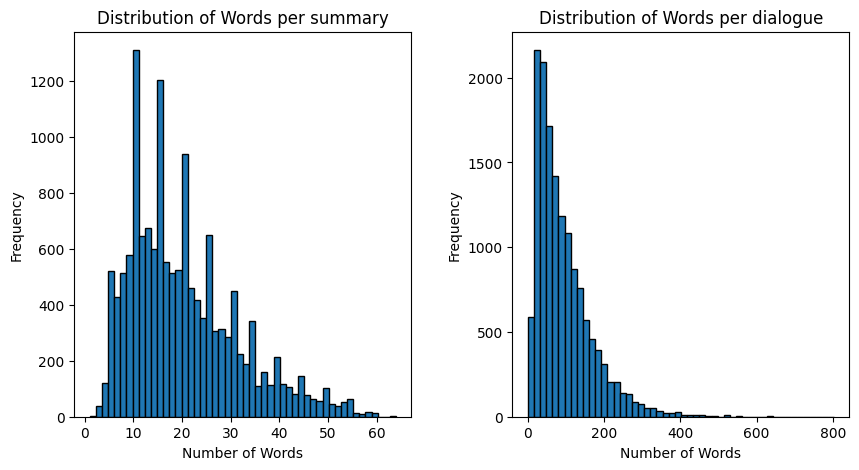

In [14]:
plot_two_hists(
    df_train["words_per_summary"], df_train["words_per_dialogue"], "summary", "dialogue"
)


In [18]:
df_train["words_per_dialogue"].describe()


,words_per_dialogue
count,14732.000000
mean,93.786383
std,74.033457
min,0.000000
25%,39.000000
50%,73.000000
75%,128.000000
max,803.000000


In [19]:
df_train["words_per_summary"].describe()

,words_per_summary
count,14732.000000
mean,20.317472
std,11.153815
min,1.000000
25%,12.000000
50%,18.000000
75%,27.000000
max,64.000000


In [20]:
# Let us check how many dialogues has more than 500 words

count = (df_train["words_per_dialogue"] > 500).sum()
print(f"Number of reviews with more than 400 words: {count}")


Number of reviews with more than 400 words: 19


### <font color = 'pickle'> **Reset dataset format** </font>


In [17]:
samsum_dataset.reset_format()


In [21]:
samsum_dataset


DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

# <font color = 'pickle'> **Data Pre-processing**</font>

## <font color = 'pickle'> **Accessing and Manuplating Splits**</font>


### <font color = 'pickle'> **Extract Splits**

In [22]:
train_split = samsum_dataset["train"]
valid_split = samsum_dataset["validation"]
test_split = samsum_dataset["test"]


In [23]:
train_split


Dataset({
    features: ['id', 'dialogue', 'summary'],
    num_rows: 14732
})

### <font color = 'pickle'> **Create subset for experimentation** </font>

In [24]:
train_split_small = train_split.shuffle(seed=42).select(range(500))
val_split_small = valid_split.shuffle(seed=42).select(range(100))
test_split_small = test_split.shuffle(seed=42).select(range(100))


### <font color = 'pickle'> **Combine splits**</font>
Some times we will need to combine different splits to one dataset. This is very useful when we have to apply the same pre-processing to all the splits.
In our example, we will combine train and validation splits as we will be applying the same processing steps to both the splits.


In [25]:
train_val = DatasetDict(
    {"train": samsum_dataset["train"], "valid": samsum_dataset["validation"]}
)
train_val_small = DatasetDict(
    {"train": train_split_small, "valid": val_split_small})


In [26]:
train_val_small


DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 500
    })
    valid: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 100
    })
})

In [27]:
train_val_small["train"]["dialogue"][0]


'Lucy: omg did you see JK this morning?\r\nSue: I try to avoid it lol\r\nLucy: you should have seen it it was disgusting\r\nSue: I cant do it anymore i try to listen to the radio in the mornings.. jk makes you think the whole world is full of idiots lol\r\nLucy: you may be right I dont know how some of them can go on there in public for the world to see\r\nSue: I would die if I got a call to go on there lol\r\nSue: could you imagine ha ha \r\nLucy: I would piss myself If I saw you and Andy up there\r\nSue: over my dead body !'

In [28]:
train_val_small["train"]["summary"][0]


"Sue doesn't watch JK any more as it's disgusting."

In [29]:
train_val_small["train"]["dialogue"][1]


"Wendy: What's up?\r\nSimon: Nothing much. I'm painting my cupboards. \r\nAngela: Cool what colour?\r\nSimon: Green.\r\nBen: I'm just chilling in the garden. \r\nAngela: Nice weekend! I'm about to meet Chris.\r\nWendy: Say hello from me!\r\nAngela: Will do! And how is your weekend, Wendy?\r\nWendy: Very lazy... The week was hard at work, I really needed some rest. \r\nBen: We should all come and visit Simon in his new apartment!\r\nSimon: You are welcome, guys! Whenever you wish.\r\nBen: I should be in Bournemouth next week. \r\nSimon: I'm not going anywhere :-)\r\nBen: Cool, I'll call you next week. "

In [30]:
train_val_small["train"]["summary"][1]


'This weekend Wendy is very lazy because she worked hard at work, and Angela is meeting Chris. Simon is chilling in the garden and painting his cupboards green. Next week, Ben, Angela, Chris and Wendy will visit him in his new apartament.'

## <font color = 'pickle'> **Tokenization**</font>

###  <font color = 'pickle'> **Load pre-trained Tokenizer** </font>

In [31]:
from transformers import AutoProcessor

checkpoint = "google/pegasus-cnn_dailymail"
tokenizer = AutoProcessor.from_pretrained(checkpoint)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

### <font color = 'pickle'> **Understanding tokenizer**</font>

In [32]:
text = [
    "Tokenization is the process of splitting sequence to tokens",
    "I like BUAN6482",
]


In [33]:
# get the vocab size
print(f"Pretrained tokenizer vocab size {tokenizer.vocab_size}")


Pretrained tokenizer vocab size 96103


In [34]:
encoded_text = tokenizer(
    text, padding=True, truncation=True, return_tensors="pt")


In [35]:
encoded_text


{'input_ids': tensor([[32487,  3884,   117,   109,   366,   113, 20186,  5936,   112, 14426,
             1],
        [  125,   172,   596, 77083, 46752,   522,     1,     0,     0,     0,
             0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])}

In [36]:
tokens_first_sentence = tokenizer.convert_ids_to_tokens(
    encoded_text.input_ids[0])
tokens_second_sentence = tokenizer.convert_ids_to_tokens(
    encoded_text.input_ids[1])

print(tokens_first_sentence)
print(tokens_second_sentence)


['▁Token', 'ization', '▁is', '▁the', '▁process', '▁of', '▁splitting', '▁sequence', '▁to', '▁tokens', '</s>']
['▁I', '▁like', '▁B', 'UAN', '648', '2', '</s>', '<pad>', '<pad>', '<pad>', '<pad>']


In [37]:
tokenizer.convert_tokens_to_string(tokens_first_sentence)


'Tokenization is the process of splitting sequence to tokens</s>'

In [38]:
special_tokens = tokenizer.all_special_tokens
special_tokens_ids = tokenizer.all_special_ids


In [39]:
import pandas as pd


In [40]:
df = pd.DataFrame(
    {"special_tokens": special_tokens, "special_tokens_ids": special_tokens_ids}
)


In [41]:
df


,special_tokens,special_tokens_ids
0,</s>,1
1,<unk>,105
2,<pad>,0
3,<mask_2>,3
4,<mask_1>,2
...,...,...
101,<unk_98>,100
102,<unk_99>,101
103,<unk_100>,102
104,<unk_101>,103


###  <font color = 'pickle'> **Create function for Tokenizer**

In [42]:
# we do not need to add padding
# padding and conversion to Pytorch Tensor is handled by the data collators
# in more efficient manner (explained later)


def tokenize_fn(batch):
    input_encodings = tokenizer(
        batch["dialogue"], truncation=True, max_length=512)

    target_encodings = tokenizer(
        text_target=batch["summary"], truncation=True, max_length=64
    )

    return {
        "input_ids": input_encodings["input_ids"],
        "attention_mask": input_encodings["attention_mask"],
        "labels": target_encodings["input_ids"],
    }


###  <font color = 'pickle'> **Use map function to apply tokenization to all splits**

In [43]:
tokenized_dataset = train_val.map(tokenize_fn, batched=True)


Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [44]:
tokenized_dataset_small = train_val_small.map(tokenize_fn, batched=True)


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [45]:
tokenized_dataset_small


DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 500
    })
    valid: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 100
    })
})

We can see that tokenization step has added three new columns ('input_ids', 'token_type_ids', 'attention_mask') to the dataset

In [46]:
tokenized_dataset_small = tokenized_dataset_small.remove_columns(
    train_val_small["train"].column_names
)
tokenized_dataset = tokenized_dataset.remove_columns(
    train_val_small["train"].column_names
)


In [47]:
tokenized_dataset_small.set_format(type="torch")
tokenized_dataset.set_format(type="torch")


In [48]:
tokenized_dataset_small


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 500
    })
    valid: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 100
    })
})

In [49]:
tokenized_dataset_small["train"].features


{'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'labels': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)}

In [50]:
print(len(tokenized_dataset_small["train"]["input_ids"][2]))
print(len(tokenized_dataset_small["train"]["input_ids"][1]))


100
149


#  <font color = 'pickle'> **Understanding Model**

##  <font color = 'pickle'> **Model Config File**</font>



In [51]:
from transformers import AutoConfig


In [52]:
config = AutoConfig.from_pretrained(checkpoint)


In [53]:
config


PegasusConfig {
  "_name_or_path": "google/pegasus-cnn_dailymail",
  "activation_dropout": 0.1,
  "activation_function": "relu",
  "add_bias_logits": false,
  "add_final_layer_norm": true,
  "architectures": [
    "PegasusForConditionalGeneration"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 16,
  "decoder_start_token_id": 0,
  "dropout": 0.1,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 16,
  "eos_token_id": 1,
  "extra_pos_embeddings": 1,
  "forced_eos_token_id": 1,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "length_penalty": 0.8,
  "max_length": 128,
  "max_position_embeddings": 1024,
  "min_length": 3

In [54]:
from transformers import GenerationConfig

# generation_config = GenerationConfig.from_model_config(config)
generation_config = GenerationConfig.from_pretrained(checkpoint)


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [55]:
generation_config


GenerationConfig {
  "bos_token_id": 0,
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "forced_eos_token_id": 1,
  "length_penalty": 0.8,
  "max_length": 128,
  "min_length": 32,
  "num_beams": 8,
  "pad_token_id": 0
}

In [56]:
def print_generation_config(config):
    print("Generation Config Parameters:")
    print("-" * 50)

    # Group parameters
    groups = {
        "Beam Search": ["num_beams", "length_penalty", "early_stopping"],
        "Length Control": ["max_length", "min_length", "max_new_tokens"],
        "Sampling": ["temperature", "top_k", "top_p", "do_sample"],
        "Quality": ["repetition_penalty", "no_repeat_ngram_size"],
        "Token IDs": ["bos_token_id", "eos_token_id", "pad_token_id",
                     "decoder_start_token_id", "forced_eos_token_id"],
        "Other": []
    }

    # Get all non-private attributes
    params = {k: v for k, v in vars(config).items() if not k.startswith('_')}

    # Print by groups
    for group, param_names in groups.items():
        print(f"\n{group}:")
        for param in param_names:
            if param in params:
                value = params.pop(param, None)
                print(f"  {param:<25}: {value}")  # Print all values, even None

    # Print remaining parameters
    if params:
        print("\nOther Parameters:")
        for param, value in sorted(params.items()):
            print(f"  {param:<25}: {value}")  # Print all values, even None

# Optional: Add color for None values


# Use either version
print_generation_config(generation_config)

Generation Config Parameters:
--------------------------------------------------

Beam Search:
  num_beams                : 8
  length_penalty           : 0.8
  early_stopping           : False

Length Control:
  max_length               : 128
  min_length               : 32
  max_new_tokens           : None

Sampling:
  temperature              : 1.0
  top_k                    : 50
  top_p                    : 1.0
  do_sample                : False

Quality:
  repetition_penalty       : 1.0
  no_repeat_ngram_size     : 0

Token IDs:
  bos_token_id             : 0
  eos_token_id             : 1
  pad_token_id             : 0
  decoder_start_token_id   : 0
  forced_eos_token_id      : 1

Other:

Other Parameters:
  assistant_confidence_threshold: 0.4
  bad_words_ids            : None
  begin_suppress_tokens    : None
  cache_config             : None
  cache_implementation     : None
  constraints              : None
  diversity_penalty        : 0.0
  dola_layers              : None
  e

In [57]:
generation_config.update(
    # Modify existing parameters
    num_beams=4,               # Reduce from 8 to 4 for balance
    early_stopping=True,
    no_repeat_ngram_size=3,
    repetition_penalty=1.2,
)

{}

In [58]:
generation_config

GenerationConfig {
  "bos_token_id": 0,
  "decoder_start_token_id": 0,
  "early_stopping": true,
  "eos_token_id": 1,
  "forced_eos_token_id": 1,
  "length_penalty": 0.8,
  "max_length": 128,
  "min_length": 32,
  "no_repeat_ngram_size": 3,
  "num_beams": 4,
  "pad_token_id": 0,
  "repetition_penalty": 1.2
}

##  <font color = 'pickle'> **Download pre-trained model**

In [59]:
from transformers import AutoModelForSeq2SeqLM


In [60]:
model = AutoModelForSeq2SeqLM.from_pretrained(
    checkpoint,
    config=config,
)

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## <font color = 'pickle'> **Model Input/Collate Function** </font>

In [63]:
from transformers import DataCollatorForSeq2Seq


In [64]:
data_collator = DataCollatorForSeq2Seq(
    tokenizer=tokenizer,
    model=model,
)


In [65]:
train_val_small['train'][0]


{'id': '13681220',
 'dialogue': 'Lucy: omg did you see JK this morning?\r\nSue: I try to avoid it lol\r\nLucy: you should have seen it it was disgusting\r\nSue: I cant do it anymore i try to listen to the radio in the mornings.. jk makes you think the whole world is full of idiots lol\r\nLucy: you may be right I dont know how some of them can go on there in public for the world to see\r\nSue: I would die if I got a call to go on there lol\r\nSue: could you imagine ha ha \r\nLucy: I would piss myself If I saw you and Andy up there\r\nSue: over my dead body !',
 'summary': "Sue doesn't watch JK any more as it's disgusting."}

In [66]:
train_val_small['train'][1]

{'id': '13716809',
 'dialogue': "Wendy: What's up?\r\nSimon: Nothing much. I'm painting my cupboards. \r\nAngela: Cool what colour?\r\nSimon: Green.\r\nBen: I'm just chilling in the garden. \r\nAngela: Nice weekend! I'm about to meet Chris.\r\nWendy: Say hello from me!\r\nAngela: Will do! And how is your weekend, Wendy?\r\nWendy: Very lazy... The week was hard at work, I really needed some rest. \r\nBen: We should all come and visit Simon in his new apartment!\r\nSimon: You are welcome, guys! Whenever you wish.\r\nBen: I should be in Bournemouth next week. \r\nSimon: I'm not going anywhere :-)\r\nBen: Cool, I'll call you next week. ",
 'summary': 'This weekend Wendy is very lazy because she worked hard at work, and Angela is meeting Chris. Simon is chilling in the garden and painting his cupboards green. Next week, Ben, Angela, Chris and Wendy will visit him in his new apartament.'}

In [67]:
features = [tokenized_dataset_small["train"][i] for i in range(2)]
features


[{'input_ids': tensor([12174,   151, 25479,   838,   368,   119,   236, 36844,   136,  1039,
            152, 12776,   151,   125,   508,   112,  1405,   126, 10898, 12174,
            151,   119,   246,   133,   684,   126,   126,   140, 27383, 12776,
            151,   125,   137,   144,   171,   126,  4288,   532,   508,   112,
           2427,   112,   109,  2413,   115,   109, 13770,   107,   107,   110,
          53724,   493,   119,   311,   109,   664,   278,   117,   357,   113,
          48310, 10898, 12174,   151,   119,   218,   129,   268,   125,  7532,
            235,   199,   181,   113,   183,   137,   275,   124,   186,   115,
            481,   118,   109,   278,   112,   236, 12776,   151,   125,   192,
           2696,   175,   125,   419,   114,   443,   112,   275,   124,   186,
          10898, 12776,   151,   256,   119,  2925,  8886,  8886, 12174,   151,
            125,   192, 48696,  1150,   240,   125,  1148,   119,   111,  7441,
            164,   186, 127

In [68]:
model_input = data_collator(features)
model_input.keys()


/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:657: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [69]:
print(model_input.input_ids[0][0:10])
print(model_input.input_ids[0][-20:])
print(model_input.input_ids[1][0:10])
print(model_input.input_ids[1][-20:])


tensor([12174,   151, 25479,   838,   368,   119,   236, 36844,   136,  1039])
tensor([147,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0])
tensor([17472,   151,   463,   131,   116,   164,   152,  6331,   151,  6490])
tensor([  125,   131,   208,   146,   313,  2240, 29344,  3703,   151,  7262,
          108,   125,   131,   267,   443,   119,   352,   396,   107,     1])


In [70]:
print(model_input.attention_mask[0][-20:])
print(model_input.attention_mask[1][-20:])


tensor([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [71]:
print(model_input.labels[0][0:10])
print(model_input.labels[0][-20:])
print(model_input.labels[1][0:10])
print(model_input.labels[1][-20:])


tensor([12776,   591,   131,   144,  1183, 36844,   189,   154,   130,   126])
tensor([-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100])
tensor([  182,  1339, 17472,   117,   221,  9474,   262,   265,   947,   514])
tensor([ 3516,   396,   108,  3703,   108, 14058,   108,  3292,   111, 17472,
          138,   558,   342,   115,   169,   177,  2971, 42745,   107,     1])


In [72]:
print(model_input.decoder_input_ids[0][0:10])
print(model_input.decoder_input_ids[0][-20:])
print(model_input.decoder_input_ids[1][0:10])
print(model_input.decoder_input_ids[1][-20:])


tensor([    0, 12776,   591,   131,   144,  1183, 36844,   189,   154,   130])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([    0,   182,  1339, 17472,   117,   221,  9474,   262,   265,   947])
tensor([  107,  3516,   396,   108,  3703,   108, 14058,   108,  3292,   111,
        17472,   138,   558,   342,   115,   169,   177,  2971, 42745,   107])


In [73]:
print(tokenizer.convert_ids_to_tokens(model_input.decoder_input_ids[0][0:10]))
print(tokenizer.convert_ids_to_tokens(model_input.labels[0][0:10]))


['<pad>', '▁Sue', '▁doesn', "'", 't', '▁watch', '▁JK', '▁any', '▁more', '▁as']
['▁Sue', '▁doesn', "'", 't', '▁watch', '▁JK', '▁any', '▁more', '▁as', '▁it']


In [74]:
print(tokenizer.convert_ids_to_tokens(model_input.decoder_input_ids[0][-20:]))
try:
    print(tokenizer.convert_ids_to_tokens(model_input.labels[0][-20:]))
except:
    print(f"No tokens corresponding to ids")


['<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
No tokens corresponding to ids


##  <font color = 'pickle'> **Understanding Model Output**


In [75]:
# model output
model_output = model(**model_input)


In [76]:
# keys in model output
model_output.keys()


odict_keys(['loss', 'logits', 'encoder_last_hidden_state'])

In [77]:
# let us look at logits
model_output.logits.shape


torch.Size([2, 51, 96103])

In [78]:
model_input.keys()


dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [79]:
# generate prediction from logits using beam search
generated_predictions = model.generate(
    input_ids=model_input['input_ids'], attention_mask =model_input['attention_mask'],
    generation_config=generation_config,
)


In [80]:
generated_predictions.shape


torch.Size([2, 81])

In [81]:
generated_predictions


tensor([[    0, 12776,   151,   125,   137,   131,   144,   171,   126,  4288,
           532,   508,   112,  2427,   112,   109,  2413,   115,   109, 13770,
           107,   107,   106, 51310,   151,   119,   218,   129,   268,   125,
          7532,   235,   199,   181,   113,   183,   137,   275,   124,   186,
           115,   481,   118,   109,   278,   112,   236, 12776,   110,   107,
           106, 42431,   151,   256,   119,  2925,  8886,  8886, 12174,   151,
           125,   192, 48696,  1150,   240,   125,  1148,   119,   111,  7441,
           164,   186, 12776,   151,   204,   161,  2609,   513,   110,   147,
             1],
        [    0,  6331,   117,  2528,   169, 22507,   107, 14058,   117, 23290,
           115,   109,  1484,   107,  3703,   117,   188, 23290,   110,   107,
           106, 61105,   117,   221,  9474,   107, 14058,   151,   125,   131,
           208,   160,   112,   670,  3292,   110,   107,     1,     0,     0,
             0,     0,     0,     0

In [82]:
generated_predictions.shape


torch.Size([2, 81])

In [83]:
tokens = tokenizer.convert_ids_to_tokens(generated_predictions[0])
tokens[0:20]


['<pad>',
 '▁Sue',
 ':',
 '▁I',
 '▁can',
 "'",
 't',
 '▁do',
 '▁it',
 '▁anymore',
 '▁i',
 '▁try',
 '▁to',
 '▁listen',
 '▁to',
 '▁the',
 '▁radio',
 '▁in',
 '▁the',
 '▁mornings']

In [84]:
summary = tokenizer.convert_tokens_to_string(tokens)
print(summary)


<pad> Sue: I can't do it anymore i try to listen to the radio in the mornings..<n>Lucy: you may be right I dont know how some of them can go on there in public for the world to see Sue .<n>Sue: could you imagine ha ha Lucy: I would piss myself If I saw you and Andy up there Sue: over my dead body !</s>


In [85]:
tokenizer.decode(generated_predictions[1])


"<pad> Simon is painting his cupboards. Angela is chilling in the garden. Ben is just chilling .<n>Wendy is very lazy. Angela: I'm about to meet Chris .</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>"

In [86]:
tokenizer.decode(generated_predictions[1], skip_special_tokens=True)


"Simon is painting his cupboards. Angela is chilling in the garden. Ben is just chilling .<n>Wendy is very lazy. Angela: I'm about to meet Chris ."

In [87]:
# decode tokens to generate summary
tokenizer.batch_decode(generated_predictions)


["<pad> Sue: I can't do it anymore i try to listen to the radio in the mornings..<n>Lucy: you may be right I dont know how some of them can go on there in public for the world to see Sue .<n>Sue: could you imagine ha ha Lucy: I would piss myself If I saw you and Andy up there Sue: over my dead body !</s>",
 "<pad> Simon is painting his cupboards. Angela is chilling in the garden. Ben is just chilling .<n>Wendy is very lazy. Angela: I'm about to meet Chris .</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>"]

In [90]:
# decode tokens to generate summary
predictions = tokenizer.batch_decode(generated_predictions, skip_special_tokens=True, clean_up_tokenization_spaces=True)


In [92]:
predictions

["Sue: I can't do it anymore i try to listen to the radio in the mornings..<n>Lucy: you may be right I dont know how some of them can go on there in public for the world to see Sue.<n>Sue: could you imagine ha ha Lucy: I would piss myself If I saw you and Andy up there Sue: over my dead body!",
 "Simon is painting his cupboards. Angela is chilling in the garden. Ben is just chilling.<n>Wendy is very lazy. Angela: I'm about to meet Chris."]

In [93]:
predictions = [p.replace("<n>", " ") for p in predictions]

In [94]:
predictions

["Sue: I can't do it anymore i try to listen to the radio in the mornings.. Lucy: you may be right I dont know how some of them can go on there in public for the world to see Sue. Sue: could you imagine ha ha Lucy: I would piss myself If I saw you and Andy up there Sue: over my dead body!",
 "Simon is painting his cupboards. Angela is chilling in the garden. Ben is just chilling. Wendy is very lazy. Angela: I'm about to meet Chris."]

In [95]:
label_ids = model_input['labels'][0:2]
label_ids

tensor([[12776,   591,   131,   144,  1183, 36844,   189,   154,   130,   126,
           131,   116, 27383,   107,     1,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100],
        [  182,  1339, 17472,   117,   221,  9474,   262,   265,   947,   514,
           134,   201,   108,   111, 14058,   117,   988,  3292,   107,  6331,
           117, 23290,   115,   109,  1484,   111,  2528,   169, 22507,  1190,
           107,  3516,   396,   108,  3703,   108, 14058,   108,  3292,   111,
         17472,   138,   558,   342,   115,   169,   177,  2971, 42745,   107,
             1]])

In [96]:
import numpy as np
label_ids = np.where(label_ids != -100, label_ids, tokenizer.pad_token_id)

In [97]:
label_ids

array([[12776,   591,   131,   144,  1183, 36844,   189,   154,   130,
          126,   131,   116, 27383,   107,     1,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [  182,  1339, 17472,   117,   221,  9474,   262,   265,   947,
          514,   134,   201,   108,   111, 14058,   117,   988,  3292,
          107,  6331,   117, 23290,   115,   109,  1484,   111,  2528,
          169, 22507,  1190,   107,  3516,   396,   108,  3703,   108,
        14058,   108,  3292,   111, 17472,   138,   558,   342,   115,
          169,   177,  2971, 42745,   107,     1]])

In [98]:
labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True)


In [99]:
labels

["Sue doesn't watch JK any more as it's disgusting.",
 'This weekend Wendy is very lazy because she worked hard at work, and Angela is meeting Chris. Simon is chilling in the garden and painting his cupboards green. Next week, Ben, Angela, Chris and Wendy will visit him in his new apartament.']

##  <font color = 'pickle'> **Evaluation metric(s)** </font>

### <font color = 'pickle'> **Function to compute metric** </font>


In [100]:
from nltk.tokenize import sent_tokenize
import evaluate
import numpy as np
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [101]:
rouge_score = evaluate.load("rouge")

In [109]:
import numpy as np
def compute_metrics(eval_pred):
    # Separate predictions and labels
    predictions, labels = eval_pred

    # Decode generated summaries into text, removing any special tokens
    decoded_predictions = tokenizer.batch_decode(
        predictions, skip_special_tokens=True)

    # Replace -100 in the labels with padding token ID, as -100 is commonly used to indicate ignored tokens
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

    # Decode reference summaries into text, removing any special tokens
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # ROUGE expects a newline after each sentence; tokenize and join sentences with newline characters
    decoded_predictions = [
        "\n".join(sent_tokenize(pred.replace("<n>", " ").strip())) for pred in decoded_predictions
    ]
    decoded_labels = [
        "\n".join(sent_tokenize(label.strip())) for label in decoded_labels
    ]

    print("predictions:", decoded_predictions)
    print("labels:", decoded_labels)

    # Compute ROUGE scores between the predictions and references, using stemming

    score = rouge_score.compute(
        predictions=decoded_predictions,
        references=decoded_labels,
        use_stemmer=True,
        use_aggregator=True,
    )

    # Scale the scores by 100 and round to four decimal places before returning
    return {key: round(value * 100, 4) for key, value in score.items()}


In [110]:
eval_pred = generated_predictions[0:2], model_input['labels'][0:2]

In [111]:
compute_metrics(eval_pred)

predictions: ["Sue: I can't do it anymore i try to listen to the radio in the mornings.. Lucy: you may be right I dont know how some of them can go on there in public for the world to see Sue .\nSue: could you imagine ha ha Lucy: I would piss myself If I saw you and Andy up there Sue: over my dead body !", "Simon is painting his cupboards.\nAngela is chilling in the garden.\nBen is just chilling .\nWendy is very lazy.\nAngela: I'm about to meet Chris ."]
labels: ["Sue doesn't watch JK any more as it's disgusting.", 'This weekend Wendy is very lazy because she worked hard at work, and Angela is meeting Chris.\nSimon is chilling in the garden and painting his cupboards green.\nNext week, Ben, Angela, Chris and Wendy will visit him in his new apartament.']


{'rouge1': 31.8885, 'rouge2': 18.1818, 'rougeL': 18.6533, 'rougeLsum': 31.8885}